<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/lecturadedatosabiertoscmszmumu-elPepino29/blob/no-le-se-a-las-brancj/CMSOpenDataZtoMuMu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis de datos para particulas


Primero cargamos las paqueterias para manejar los datos, los cuales vienen de colisisones de particulas, este conjunto contiene decaimientos a 2 muones, a saber cuales son Z

prueba

In [3]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')



In [ ]:
particles

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,173692,1245050481,8.9721,-1.6158,-2.7176,1,-0.0294,8.7183,13.5266,1.8709,2.7911,1,-0.0689,0.4202
9996,173692,1244979327,39.4543,-1.1310,-2.0568,1,0.0417,0.0000,47.7209,-0.1834,1.7965,-1,-0.0794,0.0000
9997,173692,1245305163,40.6034,-1.5051,-1.6758,-1,0.0635,0.2012,44.4382,-1.0010,1.5380,1,-0.0671,1.1499
9998,173692,1245041468,37.2853,1.0024,-2.1486,1,0.0361,0.0000,41.0945,-0.1200,0.8850,-1,-0.0291,0.0000


Todos son datos numericos dividios en caracteristicas. Del ReadMe sabemos que describen lo siguiente


Run: El numero de corrida del evento.

Event:  El numero de evento, para su identificacion precisa.
pt: El momento transverso del muon (GeV).

eta:	La pseudorapides del muon.

phi: 	el angulo phi del muon (rad).

Q: 	la carga del muon.

dxy: 	El parametro de impacto en el plano transverso con respecto al vertice del muon.

iso: 	el aislamiento combinado (Itrack + Iecal + Ihcal) del muon.

el sufijo 1 o 2 solo corresponde a si pertenece al muon 1 o 2

Estamos cazando Z's (como calderon en el 2008) nuestros datos estan muy limpios al incluir solo decaimientos de 2 muones, pero necesitamos mas criterios para eterminar cuales realemente son Z's

Como primer parametro tenemos la carga, sencillo, el boson es neutro, su carga debe conservarse en su decaimieno, por lo que ambos muones deben ser de cargas opuestas, en efecto deben sumar cero, haremos un primer filtro

In [18]:
df = particles #dataframe para los datos a limpiar
df['Qt'] = df['Q1'] + df['Q2']
df['Qt'].value_counts()

,count
Qt,
0,9664
2,186
-2,150


In [19]:
df

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2,Qt
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221,0
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000,0
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000,0
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000,0
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,173692,1245050481,8.9721,-1.6158,-2.7176,1,-0.0294,8.7183,13.5266,1.8709,2.7911,1,-0.0689,0.4202,2
9996,173692,1244979327,39.4543,-1.1310,-2.0568,1,0.0417,0.0000,47.7209,-0.1834,1.7965,-1,-0.0794,0.0000,0
9997,173692,1245305163,40.6034,-1.5051,-1.6758,-1,0.0635,0.2012,44.4382,-1.0010,1.5380,1,-0.0671,1.1499,0
9998,173692,1245041468,37.2853,1.0024,-2.1486,1,0.0361,0.0000,41.0945,-0.1200,0.8850,-1,-0.0291,0.0000,0


In [48]:

df = df[df['Qt'] == 0 ]
df


,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2,Qt,iso_rel1
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221,0,0.009138
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000,0,0.000000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000,0,0.000000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000,0,0.000000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000,0,0.029734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,173692,1244153861,38.1252,-0.4428,-2.2370,-1,0.0311,0.0000,40.7930,0.6067,1.0012,1,-0.0403,0.3160,0,0.000000
9996,173692,1244979327,39.4543,-1.1310,-2.0568,1,0.0417,0.0000,47.7209,-0.1834,1.7965,-1,-0.0794,0.0000,0,0.000000
9997,173692,1245305163,40.6034,-1.5051,-1.6758,-1,0.0635,0.2012,44.4382,-1.0010,1.5380,1,-0.0671,1.1499,0,0.004955
9998,173692,1245041468,37.2853,1.0024,-2.1486,1,0.0361,0.0000,41.0945,-0.1200,0.8850,-1,-0.0291,0.0000,0,0.000000


df_cargas solo contiene eventos con carga total cero, el resto de eventos corresponde a otras particulas (se irian al zoo)

Esta primer parte es sencilla, pues no hay discucion, debe tener carga total cero, ahora el parametro de corte sera el iso, este si es de un criterio diferente

In [49]:
fig_isos1 = px.histogram(df, x= 'iso1')
fig_isos1.show()
fig_isos2 = px.histogram(df, x= 'iso2')
fig_isos2.show()

Intentemos usar el Iso relativo

In [56]:
df['iso_rel1'] = df['iso1'] / df['pt1']
df['iso_rel2'] = df['iso2'] / df['pt2']

iso_rel1 = px.histogram(df , x = 'iso_rel1')
iso_rel1.show()
iso_rel2 = px.histogram(df , x = 'iso_rel2')
iso_rel2.show()

ahora si, con esta media podemos tomar solo aquellos eventos con muones bien definidos y aislados, aqui colocaremos el que si iso_rel sea menor a .15, que ya es muy buen aislamiento y contempla gran parte de los datos

In [62]:
df = df[df['iso_rel1'] < 0.15]
df = df[df['iso_rel2'] <0.15]
df



,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2,Qt,iso_rel1,iso_rel2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221,0,0.009138,0.099926
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000,0,0.000000,0.000000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000,0,0.000000,0.000000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000,0,0.000000,0.000000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000,0,0.029734,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,173692,1244153861,38.1252,-0.4428,-2.2370,-1,0.0311,0.0000,40.7930,0.6067,1.0012,1,-0.0403,0.3160,0,0.000000,0.007746
9996,173692,1244979327,39.4543,-1.1310,-2.0568,1,0.0417,0.0000,47.7209,-0.1834,1.7965,-1,-0.0794,0.0000,0,0.000000,0.000000
9997,173692,1245305163,40.6034,-1.5051,-1.6758,-1,0.0635,0.2012,44.4382,-1.0010,1.5380,1,-0.0671,1.1499,0,0.004955,0.025876
9998,173692,1245041468,37.2853,1.0024,-2.1486,1,0.0361,0.0000,41.0945,-0.1200,0.8850,-1,-0.0291,0.0000,0,0.000000,0.000000


respecto al paremetro de impacto, este debe ser el menor posible

In [63]:
impac1 = px.histogram(df, x = 'dxy1')
impac2 = px.histogram(df, x = 'dxy2')
impac1.show()
impac2.show()

In [66]:
df['dxy1'].describe()

,dxy1
count,8995.000000
mean,0.007175
std,0.064954
min,-0.272400
25%,-0.050850
50%,0.012500
75%,0.066800
max,2.027700


In [67]:
df['dxy2'].describe()

,dxy2
count,8995.000000
mean,0.012191
std,1.877300
min,-2.005200
25%,-0.067600
50%,-0.013300
75%,0.051600
max,177.931000


Muy pocos datos se escapan del umbral de 0.05, asi que ese sera mi corte |dxy| < 0.05

In [71]:
df = df[abs(df['dxy1'])<0.05]
df = df[abs(df['dxy2'])<0.05]
df

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2,Qt,iso_rel1,iso_rel2
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000,0,0.029734,0.000000
5,165617,77255513,38.9425,0.3522,-2.2649,-1,0.0384,0.0000,39.8616,0.2630,0.9183,1,-0.0407,0.0000,0,0.000000,0.000000
16,165617,78897689,40.5248,0.6154,-2.4147,1,0.0228,0.0000,55.7110,0.4367,0.1351,-1,0.0245,0.0000,0,0.000000,0.000000
22,165617,80578768,34.6150,1.4333,-2.3173,-1,0.0299,0.0000,51.6188,1.0359,0.6525,1,-0.0149,0.0000,0,0.000000,0.000000
25,165617,79285182,46.8549,-1.5274,0.6067,1,-0.0134,0.0000,34.9581,-0.4515,-2.1679,-1,0.0462,0.3363,0,0.000000,0.009620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,173692,1242343122,37.4613,0.9711,-2.0027,-1,0.0492,0.5597,39.3162,0.1652,1.1118,1,-0.0455,0.3240,0,0.014941,0.008241
9979,173692,1243187602,54.5563,0.2367,-2.6182,1,-0.0070,1.1444,37.7492,0.0800,0.5481,-1,0.0037,0.7497,0,0.020976,0.019860
9992,173692,1243765024,51.2271,0.5585,-2.6090,1,-0.0034,0.0000,28.6090,-0.5648,0.0468,-1,0.0450,0.0000,0,0.000000,0.000000
9994,173692,1244153861,38.1252,-0.4428,-2.2370,-1,0.0311,0.0000,40.7930,0.6067,1.0012,1,-0.0403,0.3160,0,0.000000,0.007746


faltan por considerar el momento transverso


In [73]:
momento1 = px.histogram(df , x='pt1')
momento1.show()
momento2 = px.histogram(df , x='pt2')
momento2.show()

para este tipo de analisis se usan cotas inferiores de 20 para las particulas

In [76]:
df = df[df['pt1'] >20]
df = df[df['pt2'] >20]
df

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2,Qt,iso_rel1,iso_rel2
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000,0,0.029734,0.000000
5,165617,77255513,38.9425,0.3522,-2.2649,-1,0.0384,0.0000,39.8616,0.2630,0.9183,1,-0.0407,0.0000,0,0.000000,0.000000
16,165617,78897689,40.5248,0.6154,-2.4147,1,0.0228,0.0000,55.7110,0.4367,0.1351,-1,0.0245,0.0000,0,0.000000,0.000000
22,165617,80578768,34.6150,1.4333,-2.3173,-1,0.0299,0.0000,51.6188,1.0359,0.6525,1,-0.0149,0.0000,0,0.000000,0.000000
25,165617,79285182,46.8549,-1.5274,0.6067,1,-0.0134,0.0000,34.9581,-0.4515,-2.1679,-1,0.0462,0.3363,0,0.000000,0.009620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,173692,1242343122,37.4613,0.9711,-2.0027,-1,0.0492,0.5597,39.3162,0.1652,1.1118,1,-0.0455,0.3240,0,0.014941,0.008241
9979,173692,1243187602,54.5563,0.2367,-2.6182,1,-0.0070,1.1444,37.7492,0.0800,0.5481,-1,0.0037,0.7497,0,0.020976,0.019860
9992,173692,1243765024,51.2271,0.5585,-2.6090,1,-0.0034,0.0000,28.6090,-0.5648,0.0468,-1,0.0450,0.0000,0,0.000000,0.000000
9994,173692,1244153861,38.1252,-0.4428,-2.2370,-1,0.0311,0.0000,40.7930,0.6067,1.0012,1,-0.0403,0.3160,0,0.000000,0.007746


hasta este punto ya solo tenemos eventos que
tienen carga total neutra
son muy aislados relativamente
y tienen un momento transverso considerablemente bueno

calculemos ahora la masa invariante con la formula
M^2 = 2(pt2*pt1) * (cosh(eta1 - eta2) - cos(phi1 - phi2\))

In [80]:
df['M'] = np.sqrt( 2 * df['pt1'] * df['pt2'] * (np.cosh(df['eta1'] - df['eta2']) - np.cos(df['phi1'] - df['phi2'])))
df['M_r'] = np.round(df['M'])
df

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2,Qt,iso_rel1,iso_rel2,M,M_r
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000,0,0.029734,0.000000,90.515882,91.0
5,165617,77255513,38.9425,0.3522,-2.2649,-1,0.0384,0.0000,39.8616,0.2630,0.9183,1,-0.0407,0.0000,0,0.000000,0.000000,78.860090,79.0
16,165617,78897689,40.5248,0.6154,-2.4147,1,0.0228,0.0000,55.7110,0.4367,0.1351,-1,0.0245,0.0000,0,0.000000,0.000000,91.296902,91.0
22,165617,80578768,34.6150,1.4333,-2.3173,-1,0.0299,0.0000,51.6188,1.0359,0.6525,1,-0.0149,0.0000,0,0.000000,0.000000,85.909546,86.0
25,165617,79285182,46.8549,-1.5274,0.6067,1,-0.0134,0.0000,34.9581,-0.4515,-2.1679,-1,0.0462,0.3363,0,0.000000,0.009620,91.759639,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,173692,1242343122,37.4613,0.9711,-2.0027,-1,0.0492,0.5597,39.3162,0.1652,1.1118,1,-0.0455,0.3240,0,0.014941,0.008241,83.064667,83.0
9979,173692,1243187602,54.5563,0.2367,-2.6182,1,-0.0070,1.1444,37.7492,0.0800,0.5481,-1,0.0037,0.7497,0,0.020976,0.019860,91.034295,91.0
9992,173692,1243765024,51.2271,0.5585,-2.6090,1,-0.0034,0.0000,28.6090,-0.5648,0.0468,-1,0.0450,0.0000,0,0.000000,0.000000,87.035432,87.0
9994,173692,1244153861,38.1252,-0.4428,-2.2370,-1,0.0311,0.0000,40.7930,0.6067,1.0012,1,-0.0403,0.3160,0,0.000000,0.007746,89.903304,90.0


In [87]:
df['M_r'].describe()

,M_r
count,2508.000000
mean,89.622408
std,6.317091
min,60.000000
25%,88.000000
50%,91.000000
75%,92.000000
max,119.000000


con esto podemos ver ahora nuestro histograma de masas

In [90]:
masas = px.histogram(df, x = 'M_r')
masas.show()

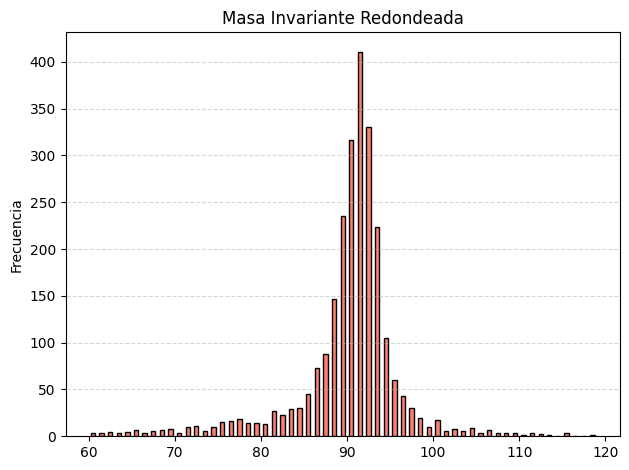

In [88]:
import matplotlib.pyplot as plt

plt.hist(df['M_r'], list(range(60, 120, 1)) , align='mid', rwidth=0.5, color='salmon', edgecolor='black')
plt.title(r'Masa Invariante Redondeada')
plt.ylabel('Frecuencia')
#plt.xticks(list(range(60, 122, 2)))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Tenemos el pico en 91, que coinside muy bien con los datos del PDG donde la masa del Z esta en M_Z​=91.1876±0.0021 GeV